In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Using TensorFlow backend.


In [2]:
import keras

In [3]:
import sys,os,os.path



In [4]:
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

In [5]:
print(X_train.shape)

(50000, 32, 32, 3)


In [6]:
print(X_train[1].shape)

(32, 32, 3)


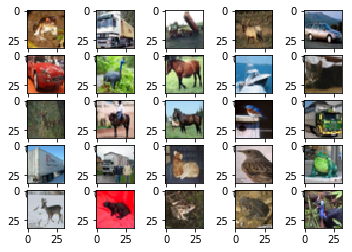

In [7]:
for i in range(0,25):
    plt.subplot(5,5,0+1+i)
    plt.imshow(X_train[i])
    
plt.show()

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0


In [9]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)


In [10]:
from keras.models import Sequential
from keras.layers import Dropout,Activation,Conv2D,GlobalAveragePooling2D
from keras.optimizers import SGD

In [11]:
def allcnn(weights=None):
    
           
    model = Sequential()
    model.add(Conv2D(96,(3,3),padding='same',input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))
              
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))
              
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1),padding='valid'))
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
              
    
    if weights:
        
        model.load_weights(weights)
    return model
    
        
              
        

In [12]:
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9
weights = 'weights.hdf5'
model = allcnn(weights)
sgd = SGD(lr = learning_rate,decay=weight_decay,momentum=momentum,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer = sgd,metrics=['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)       166080    
__________

In [13]:
#epochs = 1
#batch_size = 300
#model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs=epochs,batch_size=batch_size,verbose=1)
#test on pretrained weights

scores = model.evaluate(X_test,Y_test,verbose=1)
print(scores[1])


10000/10000 [==============================] - 54s 5ms/step
0.9088


In [14]:
print(scores)

[0.4994177602058277, 0.9088]


In [15]:
classes = range(0,10)
names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
class_labels = dict(zip(classes,names))

print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [27]:
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)
predictions = model.predict(batch,verbose=1)

9/9 [==============================] - 0s 6ms/step


In [28]:
class_results = np.argmax(predictions,axis=-1)
print(class_results)

[4 5 6 3 1 1 3 6 8]


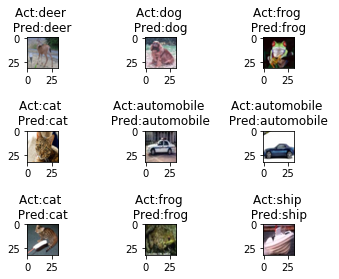

In [42]:
plt.subplots_adjust(hspace=2)

for i in range(0,len(batch)):
    
    plt.subplot(3,3,0+1+i)
    plt.imshow(batch[i])
    
    plt.title('Act:{} \n Pred:{} '.format(class_labels[labels[i]],class_labels[class_results[i]]))
    
    
plt.show()